In [1]:
import pathlib
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

1. Persiapan Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Mendefinisikan path ke dataset di Google Drive
path_to_dataset = '/content/drive/MyDrive/Coba/Glass'

Membuat instance ImageDataGenerator untuk augmentasi gambar

In [4]:
image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

Memuat dataset dari Google Drive

In [5]:
train_dataset = image_generator.flow_from_directory(
    directory=path_to_dataset,
    target_size=(224, 224),
    batch_size=32,
    subset='training'
)

validation_dataset = image_generator.flow_from_directory(
    directory=path_to_dataset,
    target_size=(224, 224),
    batch_size=32,
    subset='validation'
)

Found 214 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


In [6]:
# Menentukan jumlah kelas (num_classes) berdasarkan jumlah subfolder dalam dataset
num_classes = len(train_dataset.class_indices)

2. Pembuatan Model

In [7]:
from tensorflow.keras.applications.mobilenet import MobileNet

# Load the MobileNet model
pre_trained_model = MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

pre_trained_model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [8]:
# Menambahkan layer kustom di atas model pre-trained
model = tf.keras.Sequential([
    pre_trained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 2

In [ ]:
# Compile model
#from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

3. Pelatihan Model

In [ ]:
batch=30
history = model.fit(train_dataset,
              validation_data=validation_dataset,
              epochs=20,
              steps_per_epoch = train_dataset.samples//batch,
              validation_steps = validation_dataset.samples//batch,
              verbose = 1
          )

Epoch 1/20
7/7 [==============================] - 86s 10s/step - loss: 0.6947 - accuracy: 0.6589 - val_loss: 0.4508 - val_accuracy: 0.8125
Epoch 2/20
7/7 [==============================] - 56s 8s/step - loss: 0.2697 - accuracy: 0.9439 - val_loss: 0.4409 - val_accuracy: 0.8125
Epoch 3/20
7/7 [==============================] - 56s 8s/step - loss: 0.1481 - accuracy: 0.9720 - val_loss: 0.4438 - val_accuracy: 0.8750
Epoch 4/20
7/7 [==============================] - 53s 8s/step - loss: 0.0893 - accuracy: 0.9766 - val_loss: 0.3442 - val_accuracy: 0.8750
Epoch 5/20
7/7 [==============================] - 59s 9s/step - loss: 0.0665 - accuracy: 0.9860 - val_loss: 0.2338 - val_accuracy: 0.9062
Epoch 6/20
7/7 [==============================] - 58s 8s/step - loss: 0.0569 - accuracy: 0.9860 - val_loss: 0.3139 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 56s 8s/step - loss: 0.0340 - accuracy: 0.9953 - val_loss: 0.0860 - val_accuracy: 0.9688
Epoch 8/20
7/7 [=================

4. Deskripsi Gambar

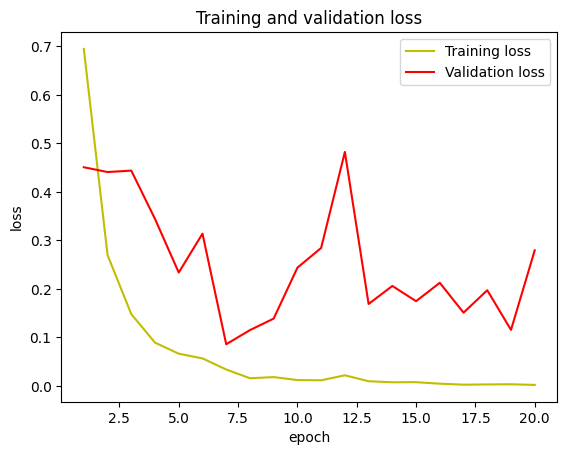

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'y',label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

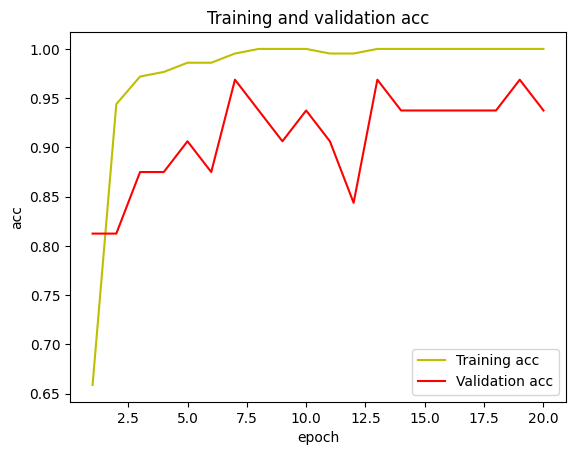

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(loss)+1)

plt.plot(epochs,acc,'y',label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/Coba/model_glass.h5')
model=load_model('/content/drive/MyDrive/Coba/model_glass.h5')

In [ ]:
class_name = train_dataset.class_indices
class_name = list(dict.keys(class_name))
print(class_name)

['Botol', 'Pecahan Kaca']


In [ ]:
# Load the HDF5 model
model = tf.keras.models.load_model('/content/drive/MyDrive/Coba/model_glass.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to file
with open('model_glass.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Coba/model_glass.h5')

In [ ]:
# Mengklasifikasikan gambar menggunakan model
# Ambil contoh satu gambar untuk dijadikan deskripsi dan rekomendasi
image_path = '/content/bk2.jpg'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = tf.expand_dims(image_array, 0)
image_array = image_array / 255.0  # Normalisasi

In [ ]:
predictions = loaded_model.predict(image_array)
predicted_class = tf.argmax(predictions[0])

description = ""
if predicted_class == 0:
    description = "Ini adalah Botol Kaca."
elif predicted_class == 1:
    description = "Ini adalah Pecahan Kaca."

print(description)

1/1 [==============================] - 0s 168ms/step
Ini adalah Botol Kaca.


5. Rekomendasi Daur Ulang

In [ ]:
# Buat rekomendasi berdasarkan kelas yang diprediksi
recommendation = ""
if predicted_class == 0:
    recommendation = "Daur ulang botol plastik dengan memasukkannya ke tempat pengumpulan botol plastik terpisah."
elif predicted_class == 1:
    recommendation = "Daur ulang kaleng aluminium dengan memasukkannya ke tempat pengumpulan kaleng aluminium terpisah."
elif predicted_class == 2:
    recommendation = "Daur ulang kertas dengan memasukkannya ke tempat pengumpulan kertas terpisah."
elif predicted_class == 3:
    recommendation = "Daur ulang kardus dengan memasukkannya ke tempat pengumpulan kardus terpisah."
elif predicted_class == 4:
    recommendation = "Daur ulang botol kaca dengan memasukkannya ke tempat pengumpulan botol kaca terpisah."
elif predicted_class == 5:
    recommendation = "Hindari penggunaan kantong plastik. Gantilah dengan tas belanja yang dapat digunakan berulang kali."

In [ ]:
# Cetak deskripsi dan rekomendasi
print("Deskripsi: ", description)
print("Rekomendasi: ", recommendation)